In [1]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding,TSNE,MDS
from sklearn.decomposition import PCA
from time import time
from matplotlib.ticker import NullFormatter
import numpy as np

In [2]:
import scipy.io
mat = scipy.io.loadmat('face.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'id'])

In [9]:
y = mat['Y']
y

array([[[ 42,  45,  38, ...,  38, 164,  42],
        [ 43,  50,  36, ...,  43, 161,  39],
        [ 44,  50,  35, ...,  43, 135,  43],
        ...,
        [ 84,  57,  49, ...,  53,  70,  71],
        [111,  51,  50, ...,  51, 119,  93],
        [142,  48,  50, ...,  55, 135, 120]],

       [[ 43,  46,  36, ...,  41, 164,  44],
        [ 43,  50,  34, ...,  39, 157,  42],
        [ 41,  49,  36, ...,  37, 129,  43],
        ...,
        [ 83,  55,  46, ...,  50,  65,  63],
        [106,  50,  45, ...,  52, 114,  86],
        [135,  48,  46, ...,  52, 133, 116]],

       [[ 42,  45,  35, ...,  41, 164,  43],
        [ 41,  49,  34, ...,  37, 155,  42],
        [ 38,  50,  37, ...,  34, 131,  41],
        ...,
        [106,  51,  45, ...,  50,  51,  69],
        [126,  50,  44, ...,  50,  74,  91],
        [151,  51,  46, ...,  52,  98, 116]],

       ...,

       [[154, 157, 155, ..., 151, 152, 156],
        [155, 156, 152, ..., 150, 151, 156],
        [151, 156, 155, ..., 150, 151, 155

In [8]:
print(y.shape)

(112, 92, 33)


In [6]:
ids = mat['id']
ids

array([[29, 21, 15,  2, 32, 16,  6, 31, 17, 27, 33, 18, 22, 24, 28, 13,
        12,  8,  1, 23, 26, 10, 25,  7,  5, 11, 20,  4,  3, 14, 19,  9,
        30]], dtype=uint8)

In [10]:
data_matrix = np.reshape(ids,(33))
print(data_matrix)

[29 21 15  2 32 16  6 31 17 27 33 18 22 24 28 13 12  8  1 23 26 10 25  7
  5 11 20  4  3 14 19  9 30]


In [11]:
sort_index = np.argsort(data_matrix)
sort_index = sort_index[::-1]
sort_index

array([10,  4,  7, 32,  0, 14,  9, 20, 22, 13, 19, 12,  1, 26, 30, 11,  8,
        5,  2, 29, 15, 16, 25, 21, 31, 17, 23,  6, 24, 27, 28,  3, 18])

In [12]:
X = np.reshape(y,[10304,33]).T
X.shape

(33, 10304)

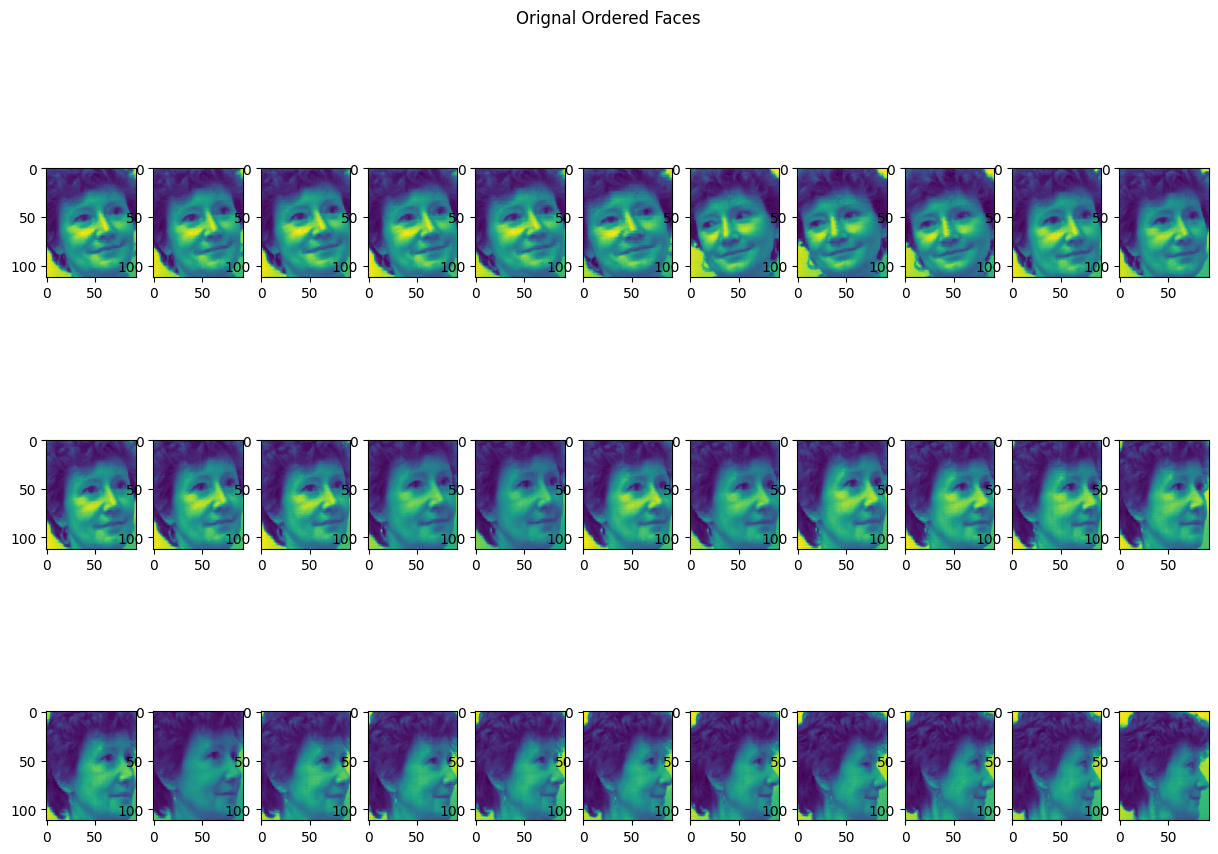

In [13]:
plt.figure(figsize=(15,10))
plt.suptitle("Orignal Ordered Faces")
for i in range(0,33):
    plt.subplot(3,11,i+1)
    plt.imshow(y[:,:,sort_index[i]])
plt.show()

### MDS embedding

  We perform Multidimensional Scaling (MDS) on the input data X using a specified number of components (component).

  The MDS algorithm aims to reduce the dimensionality of the data while preserving the pairwise distances between the samples.

  The resulting MDS embeddings are stored in the faces_mds variable after fitting the MDS model with a maximum of 2000 iterations and a single initialization.

In [14]:
neighbour = 5
component = 2

In [15]:
mds_embedding = MDS(component,max_iter=2000,n_init = 1)
faces_mds = mds_embedding.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0.5, 1.0, 'MDS Embedding')

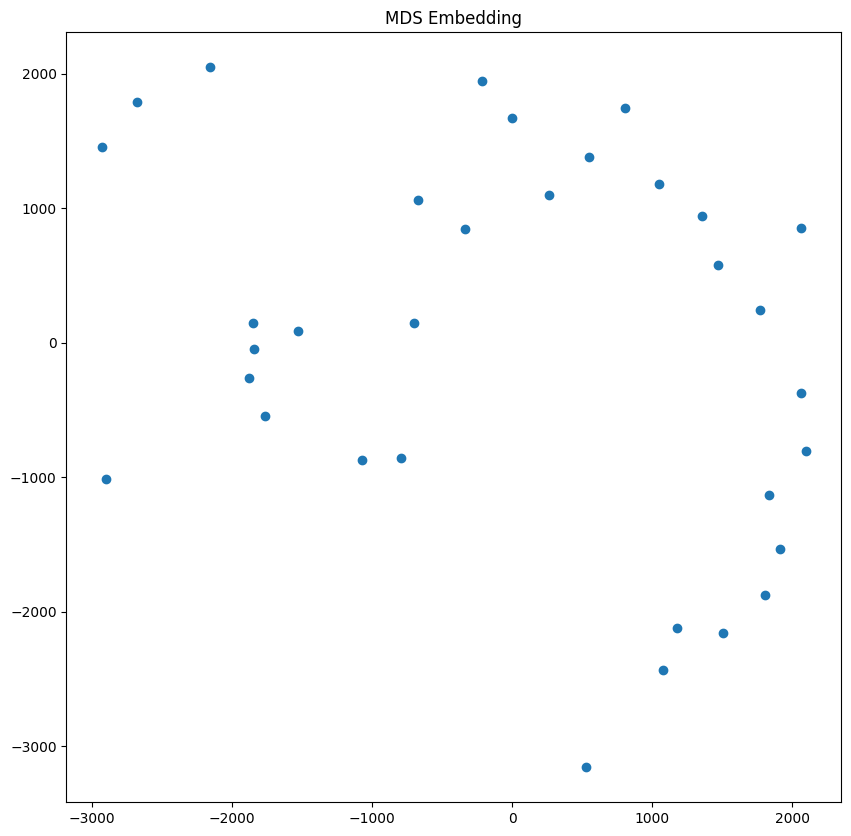

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(faces_mds[:,0],faces_mds[:,1])
plt.title("MDS Embedding")

In [17]:
mds_idx = np.argsort(faces_mds[:,0])

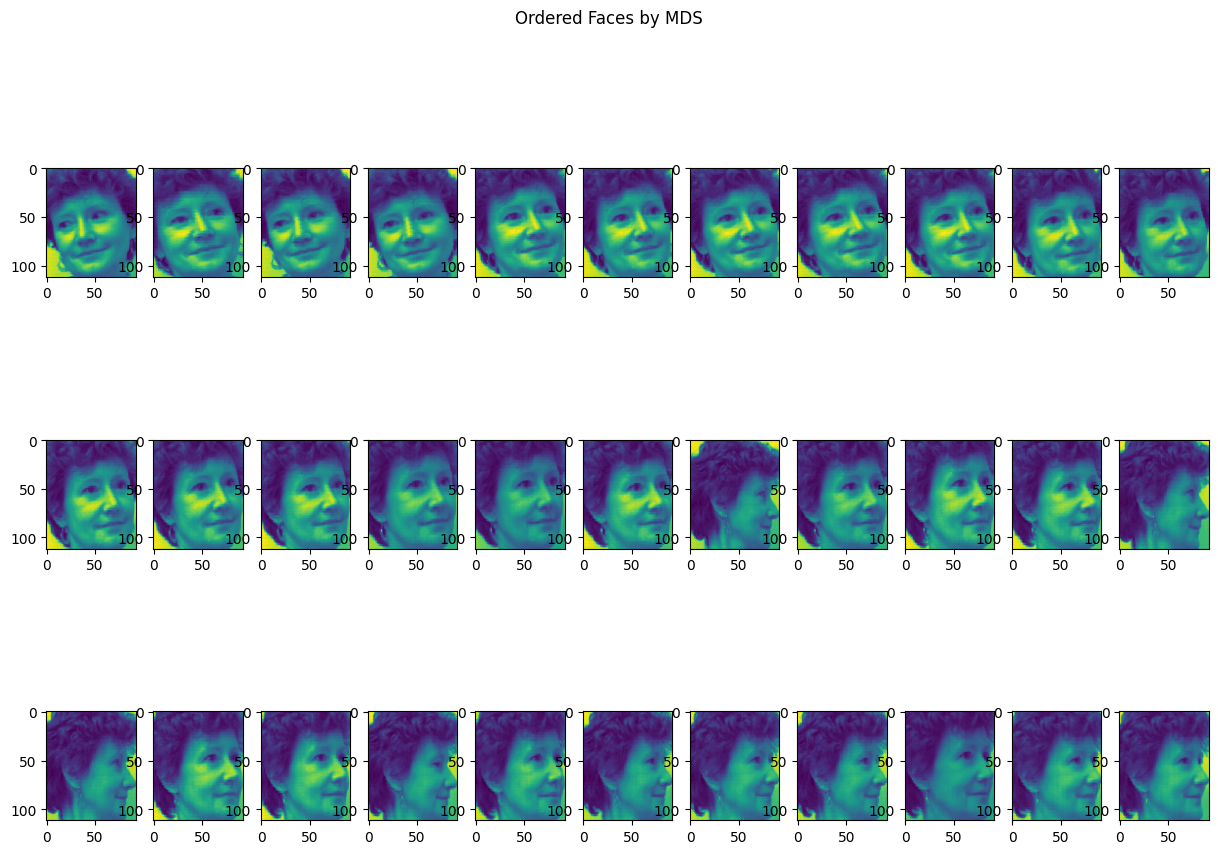

In [18]:
plt.figure(figsize=(15,10))
plt.suptitle("Ordered Faces by MDS")
for i in range(0,33):
    plt.subplot(3,11,i+1)
    plt.imshow(y[:,:,mds_idx[i]])
plt.show()

### ISO Map Embedding

  We performs Isomap embedding on the input data X using a specified number of neighbors (n_neighbors) and components (component).

  Isomap is a nonlinear dimensionality reduction technique that constructs a low-dimensional representation of the data by preserving the geodesic distances between samples on a manifold.

  The resulting Isomap embeddings are stored in the face_isomap variable after fitting the Isomap model with a maximum of 2000 iterations.

In [19]:
iso_embedding = Isomap(n_neighbors=neighbour,n_components=component, max_iter=2000)
face_isomap = iso_embedding.fit_transform(X)

Text(0.5, 1.0, 'ISOMAP Embedding')

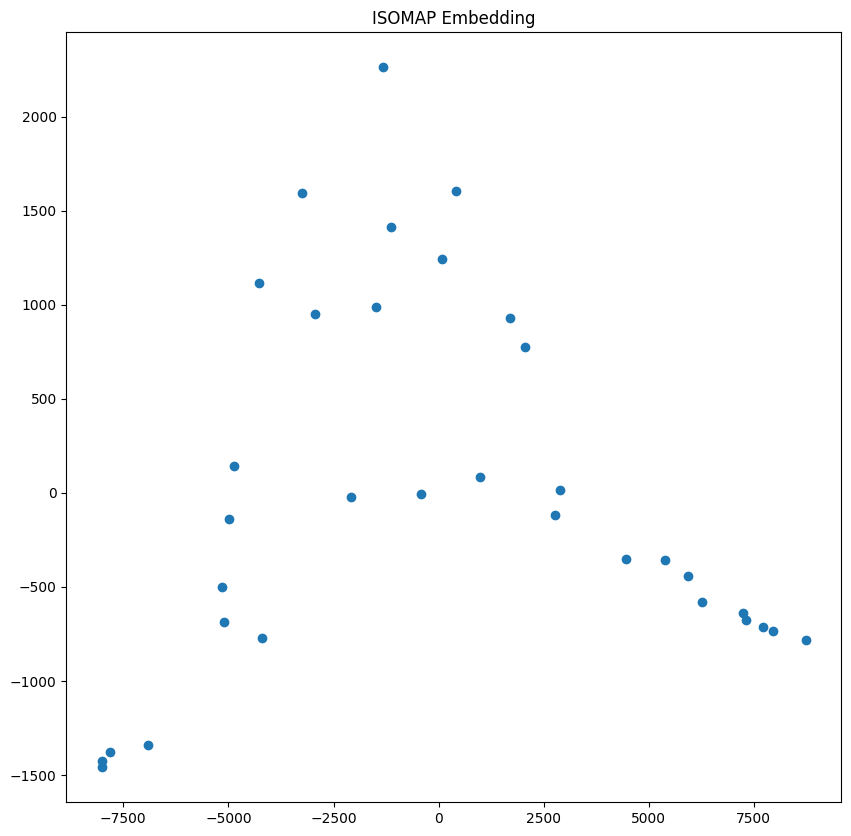

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(face_isomap[:,0],face_isomap[:,1])
plt.title("ISOMAP Embedding")

In [22]:
isomap_idx = np.argsort(face_isomap[:,0])
isomap_idx

array([ 9, 20, 22, 14,  4, 10,  0, 32, 13,  7, 19, 12,  1, 26, 30, 11,  8,
        5,  2, 29, 15, 16, 25, 21, 31, 17, 23,  6, 24, 27, 28,  3, 18])

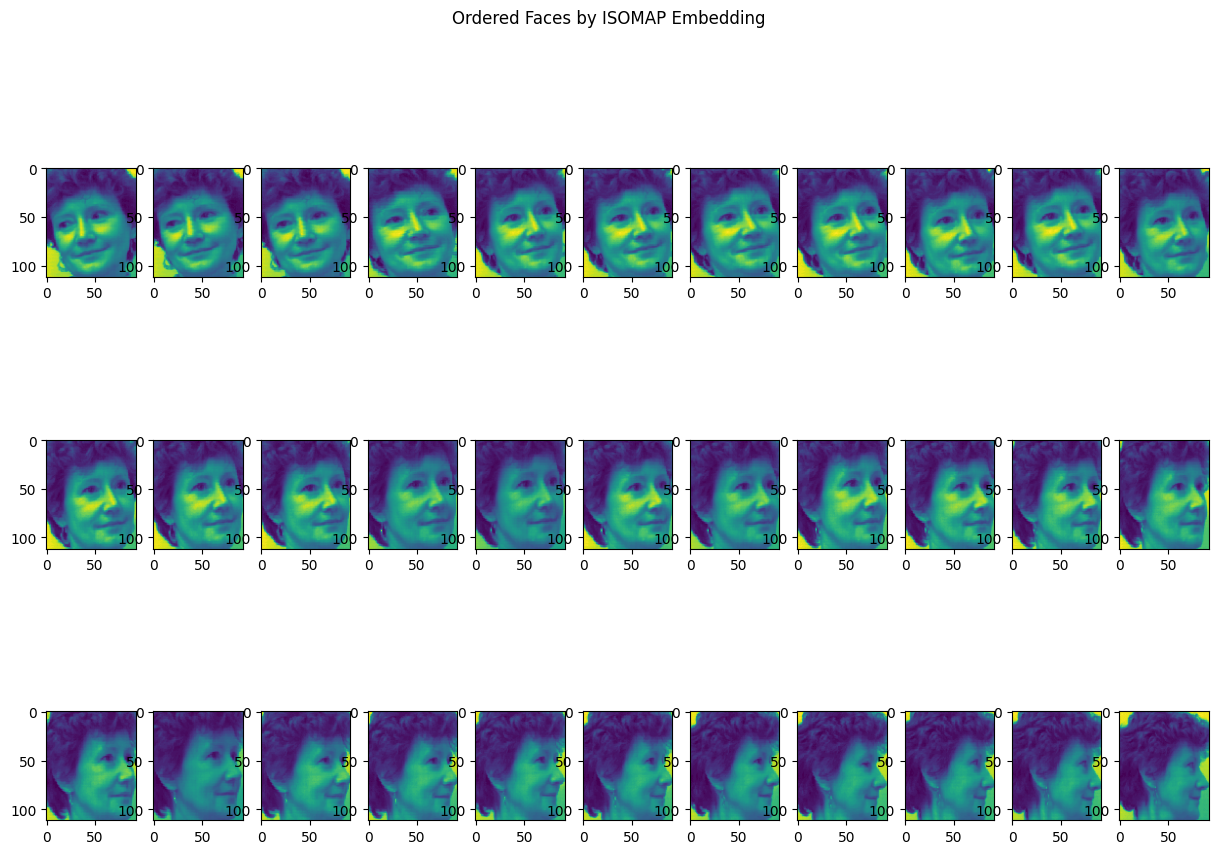

In [23]:
plt.figure(figsize=(15,10))
plt.suptitle("Ordered Faces by ISOMAP Embedding")
for i in range(0,33):
    plt.subplot(3,11,i+1)
    plt.imshow(y[:,:,isomap_idx[i]])
plt.show()

### LLE Embedding

  We performs Locally Linear Embedding (LLE) on the input data X using a specified number of components (component) and neighbors (n_neighbors). LLE is a nonlinear dimensionality reduction technique that aims to preserve local relationships between neighboring samples.

  The LLE model is initialized with parameters such as the maximum number of iterations (max_iter), eigen_solver, and method.

  The resulting LLE embeddings are stored in the face_lle variable after fitting the LLE model with a maximum of 2000 iterations.

In [24]:
lle = LocallyLinearEmbedding(n_components=component,n_neighbors=neighbour,max_iter=2000,eigen_solver='auto',method='standard')

In [25]:
face_lle = lle.fit_transform(X)

Text(0.5, 1.0, 'LLE Embedding')

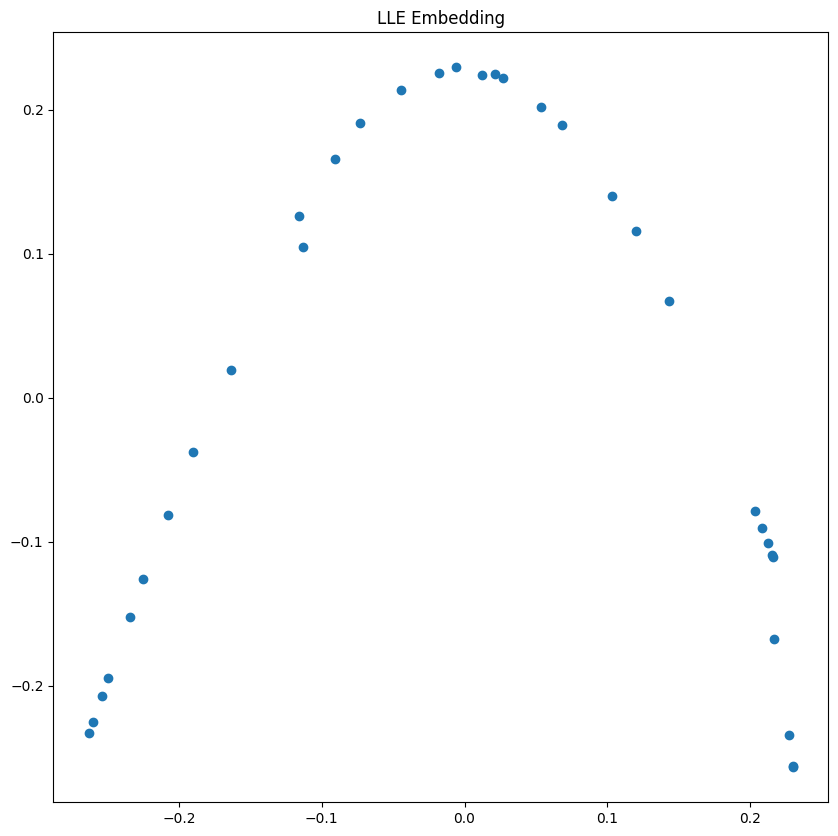

In [27]:
plt.figure(figsize=(10,10))
plt.scatter(face_lle[:,0],face_lle[:,1])
plt.title("LLE Embedding")

In [28]:
lle_sort = np.argsort(face_lle[:,0])
lle_sort

array([18,  3, 28, 27, 24,  6, 23, 17, 31, 25, 21, 16, 15, 29,  2,  5,  8,
       11, 30, 26,  1, 12, 19, 13, 32,  0,  7, 10,  4, 14, 22, 20,  9])

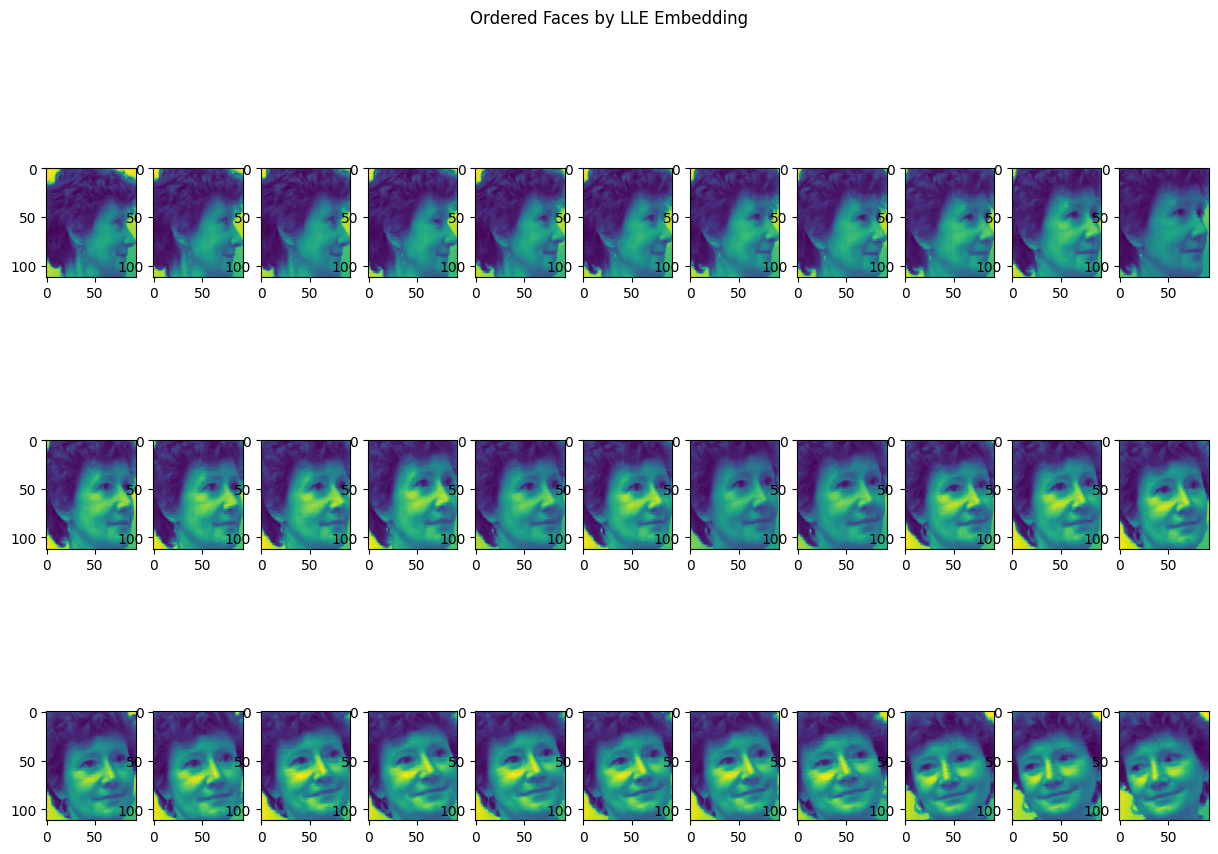

In [29]:
plt.figure(figsize=(15,10))
plt.suptitle("Ordered Faces by LLE Embedding")
for i in range(0,33):
    plt.subplot(3,11,i+1)
    plt.imshow(y[:,:,lle_sort[i]])
plt.show()

### Spectral Embedding

  We performs Spectral Embedding on the input data X using a specified number of components (component). Spectral Embedding is a technique for dimensionality reduction that maps the data into a lower-dimensional space using the eigenvectors of a graph Laplacian matrix. <br>
  The SpectralEmbedding model is initialized with parameters such as affinity (set to 'nearest_neighbors' for using k-nearest neighbors graph), gamma, random_state, eigen_solver, n_neighbors, and n_jobs. <br>
  The resulting Spectral Embedding embeddings are stored in the face_Le variable after fitting the model to the input data X.<br>






In [32]:
LE = SpectralEmbedding(n_components=component,affinity='nearest_neighbors', gamma=None, random_state=None, eigen_solver=None, n_neighbors=None, n_jobs=None)
face_Le = LE.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Spectral Embedding')

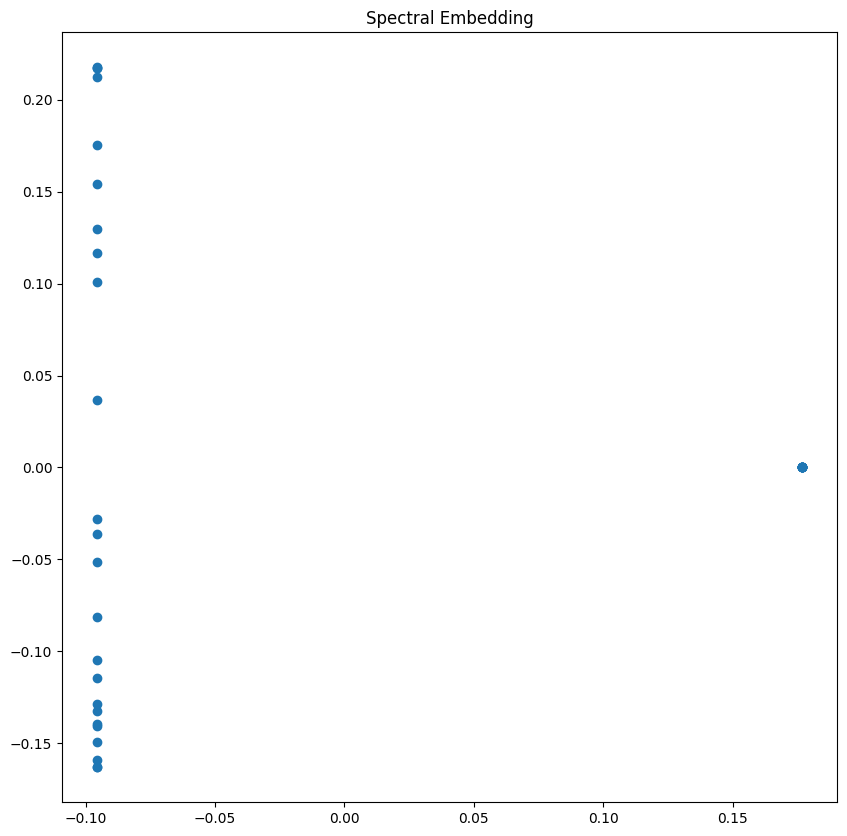

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(face_Le[:,0],face_Le[:,1])
plt.title("Spectral Embedding")

In [33]:
Le_sort = np.argsort(face_Le[:,0])
Le_sort

array([ 6, 23, 24,  3, 18, 28, 17, 27, 31, 21, 15, 16, 25, 29,  5,  2, 11,
       30,  8, 26,  1, 12, 19, 13, 20,  9, 22, 14,  0,  7, 10,  4, 32])

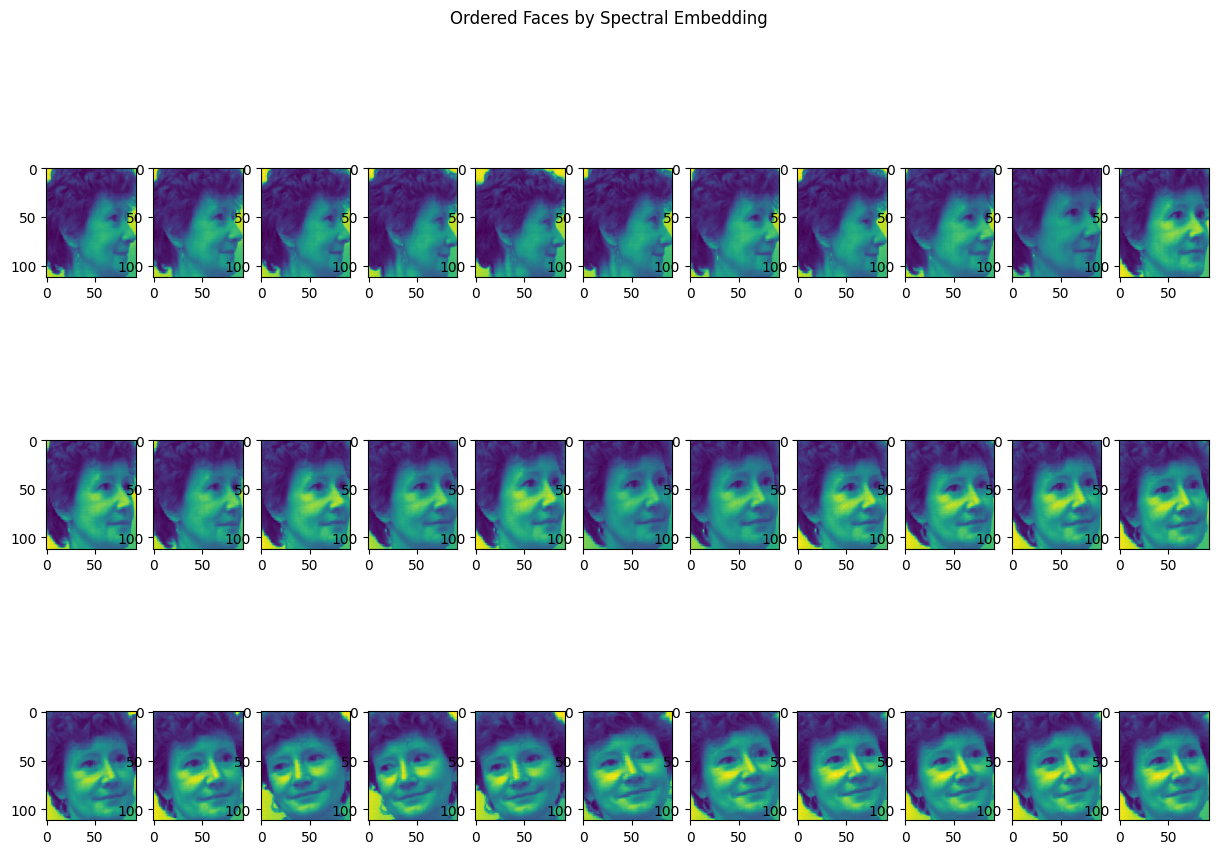

In [37]:
plt.figure(figsize=(15,10))
plt.suptitle("Ordered Faces by Spectral Embedding")
for i in range(0,33):
    plt.subplot(3,11,i+1)
    plt.imshow(y[:,:,Le_sort[i]])
plt.show()